## 변수 별 정보

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df=pd.read_csv('titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


titanic_df.shape

In [6]:
# 데이터 칼럼 타입 확인
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 결측치 파악

In [7]:
# Null 값 개수 확인
titanic_df['Age'].isnull().sum()

177

In [8]:
titanic_df['Cabin'].isnull().sum()

687

In [9]:
titanic_df['Embarked'].isnull().sum()

2

## 데이터 전처리 : 결측치 처리

### NULL 컬럼들에 대한 처리
- 사이킷 머신러닝 알고리즘은 Null값을 허용하지 않는다
- DataFrame()의 fillna()메서드를 사용해서
- Null값을 평균 또는 고정값으로 변경
- Age : 평균 나이로 변경
- 나머지 컬럼 : 'N'으로 변경

In [16]:
# Null처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna("N",inplace=True)
titanic_df['Embarked'].fillna("N",inplace=True)

# 모든 컬럼의 Null 값을 합산해서 Null 값이 없는지 확인
print(titanic_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


### 문자열 변수(feature) 빈도 분포 확인 : value_counts()

In [17]:
print('Sex분포: \n', titanic_df['Sex'].value_counts())
print('Cabin분포: \n', titanic_df['Cabin'].value_counts())
print('Embarked분포: \n', titanic_df['Embarked'].value_counts())

Sex분포: 
 male      577
female    314
Name: Sex, dtype: int64
Cabin분포: 
 N              687
G6               4
B96 B98          4
C23 C25 C27      4
D                3
              ... 
C91              1
C50              1
A10              1
D6               1
E38              1
Name: Cabin, Length: 148, dtype: int64
Embarked분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


### 문자열 변수 Cabin값 변경

In [19]:
# cabin의 첫 번째 문자만 추출해서 표기
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

# 선실등급 별 개수 확인
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

### 성별에 따른 생존자수 분포(EDA)
머신러닝 알고리즘 적용해서 예측 수행 전에 데이터 탐색
- 어떤 유형의 승객이 생존 확률이 높았는지 확인
- 성별이 생존 확률에 어떤 영향을 미쳤는지 확인
- 성별에 따른 생존자 수 비교

In [23]:
titanic_df.groupby('Survived')['Survived'].count()
# titanic_df.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [22]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

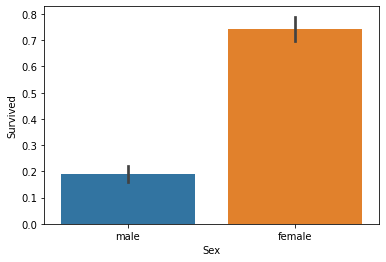

In [26]:
# 성별 생존자 : 막대 그래프(barplot)
sns.barplot(data=titanic_df,x='Sex',y='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

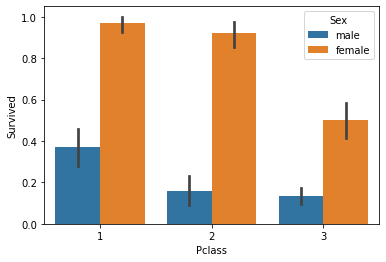

In [29]:
# 객실 등급별 / 성별생존확률
sns.barplot(data=titanic_df,x='Pclass', y= 'Survived',hue='Sex')

### 데이터 전처리 : 구간화(binning)
#### 연령대에 따른 생존자수 분포
- 연령은 수치형 변수이므로 범주형으로 구간화

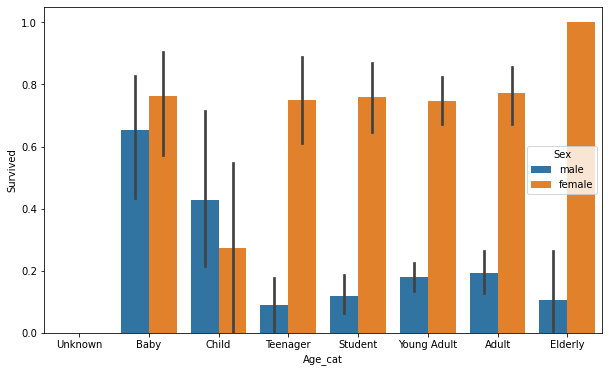

In [31]:
def get_category(age):
    cat = ''
    if age <= -1 : cat='Unknown'
    elif age <=5:cat = 'Baby'
    elif age <=12:cat = 'Child'
    elif age <=18:cat = 'Teenager'
    elif age <=25:cat = 'Student'
    elif age <=35:cat = 'Young Adult'
    elif age <=60:cat = 'Adult'
    else: cat = 'Elderly'
    
    return cat

plt.figure(figsize=(10,6))

group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

In [32]:
from sklearn import preprocessing

def encode_features(dataDF):
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3
